## Set up the notebook 

In [45]:
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras 

%matplotlib inline


from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron


## Peceptron algorithm

The perceptron algorithm can compute outputs by: 

Hwb(X) = θ(XW+b) 

Where X is the input matrix, W is a matrix of connection weights (one row per input neuron and one col per layer), b is a vector of biases and θ describes learning rates.

The perceptron makes a prediction for the ith input to the model. If this prediction is incorrect, alternative connection weights are applied. This is summarised by the perceptron learning rule: 

w ij (+1) = w ij +n(yj - y'j)xi

Where w ij is a connection weight betweren input neuron i and output neuron j. xi is the ith input and y'j is the output of the jth output neuron and yj is the 'correct' output, lastly n describes a learning rate. 

The perceptron has very limited capabiliies on its own because it is inherently linear, stacking them to produce multilayer perceptrons is when thinngs get pretty powerful. 

Below I implement the perceptron with iris.


[0, 5, 0, 2]

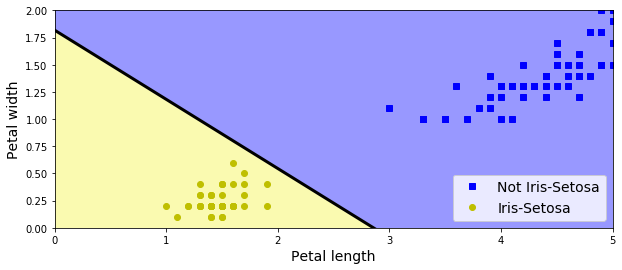

In [5]:
iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)
per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)
y_pred = per_clf.predict([[2, 0.5]])
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]
x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

## Activation functions 

In [24]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def relu(z):
    return np.maximum(0, z) # not continuous buyt works well 
def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

[-5, 5, -0.2, 1.2]

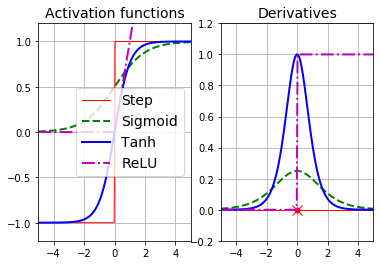

In [25]:
z = np.linspace(-5, 5, 200)
plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

## NN classifier 

In [7]:
# What version are we using 
tf.__version__

'2.1.0'

In [8]:
keras.__version__

'2.2.4-tf'

In [9]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# again let's split these into test and training sets 
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

Pullover


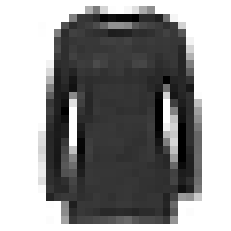

In [20]:
class_names = ["T-shirt/top", "Trouser", 
               "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", 
               "Bag", "Ankle boot"]

plt.imshow(X_train[364], cmap="binary")
print(class_names[y_train[364]])
plt.axis('off')
plt.show()


Ankle boot


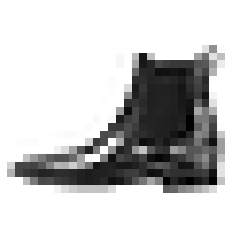

In [21]:
plt.imshow(X_train[5], cmap="binary")
print(class_names[y_train[5]])
plt.axis('off')
plt.show()


## Keras NN

In [22]:
# tHE FIRST STEP IN THE MODEL IS TO CREATE A MODEL. SImuly we create a a template for a sequential model 
#model = keras.models.Sequential()
# Here we add a reshaping layer, this ensures the correct model shape, i.e. a processing layer. 
#model.add(keras.layers.Flatten(input_shape=[28, 28]))
# We add a dense layer with 300 then 100 neurons here with relu activation 
#model.add(keras.layers.Dense(300, activation="relu"))
#model.add(keras.layers.Dense(100, activation="relu"))
# as we have distinct and independant classes we can use the softmax function 
#model.add(keras.layers.Dense(10, activation="softmax"))


model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [27]:
# extract a model summary - huge number of parameters 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [35]:
hidden1 = model.layers[1]
hidden1.name

weights, biases = hidden1.get_weights()

In [39]:
biases.shape

(300,)

In [40]:
weights.shape

(784, 300)

In [41]:
# build model 
model.compile(loss="sparse_categorical_crossentropy", # allows us to have intergers as targets 
              optimizer="sgd", # s grad desc default lkearning rate would need to be tuned
              metrics=["accuracy"])

In [48]:
# fit the algo on the training data 
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid)) 

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 4s 67us/sample - loss: 0.2188 - accuracy: 0.9224 - val_loss: 0.3037 - val_accuracy: 0.8892
Epoch 2/30
55000/55000 [==============================] - 4s 66us/sample - loss: 0.2154 - accuracy: 0.9215 - val_loss: 0.2992 - val_accuracy: 0.8908
Epoch 3/30
55000/55000 [==============================] - 4s 67us/sample - loss: 0.2110 - accuracy: 0.9237 - val_loss: 0.2973 - val_accuracy: 0.8960
Epoch 4/30
55000/55000 [==============================] - 4s 67us/sample - loss: 0.2081 - accuracy: 0.9252 - val_loss: 0.3004 - val_accuracy: 0.8908
Epoch 5/30
55000/55000 [==============================] - 4s 67us/sample - loss: 0.2048 - accuracy: 0.9249 - val_loss: 0.3005 - val_accuracy: 0.8964
Epoch 6/30
55000/55000 [==============================] - 4s 68us/sample - loss: 0.2021 - accuracy: 0.9279 - val_loss: 0.2850 - val_accuracy: 0.8952
Epoch 7/30
55000/55000 [==============================] -

In [44]:
tf.test.is_gpu_available()


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

Below we can see smallincreases in accuracy over epochs, note that the training curves are closely tracking the validations implyiing that this is a low bias model. 

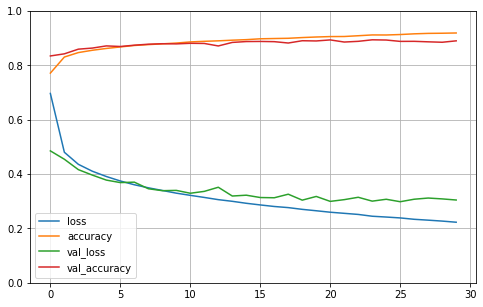

In [47]:
# lets view the performance ovetr time

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [49]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 49us/sample - loss: 0.3688 - accuracy: 0.8788


[0.3688115834712982, 0.8788]

we can also extract the probability estiamtes for each class. Here we just display 1:5

In [67]:
X_d = X_test[:5]
y_probability = model.predict(X_d)
y_probability.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        1.   ],
       [0.   , 0.   , 0.999, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.011, 0.   , 0.   , 0.   , 0.   , 0.   , 0.988, 0.   , 0.   ,
        0.   ]], dtype=float32)

In [69]:
y_new = y_test[:5]
y_new

array([9, 2, 1, 1, 6], dtype=uint8)

In [68]:
y_pred = model.predict_classes(X_d)
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
      dtype='<U11')

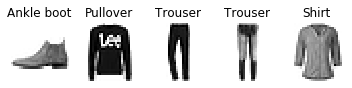

In [71]:
# We got the predictions here correct! 
for index, image in enumerate(X_d):
    plt.subplot(1, 5, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()